<a href="https://colab.research.google.com/github/Mallikarjun1235/Computer_vision/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brain Tumor Classification**

Brain is one of the vital organs in the human body, which consists of billions of cells. The abnormal group of cell is formed from the uncontrolled division of cells, which is also called as tumor. Brain tumor are divided into two types such malignant (stage1) and benign (stage2) tumor. Low grade brain tumor is called as benign. Similarly, the high grade tumor is also called as malignant. Benign tumor is not cancerous tumor. Hence it doesn’t spread other parts of the brains. However the malignant tumor is a cancerous tumor. So it spreads rapidly with indefinite boundaries to other region of the body easily. It leads to immediate death.

Based on the image data build a Deep Learning model that can predict whether it can classify the image as of tumor image or a normal image.

**Task1: Load the required libraries**


In [ ]:
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Task2: List the directory to read the data**

In [ ]:

folder_path = '/content/drive/MyDrive/computer_vision/yesdata'
        
# Train the model on the two persons' images
tumor= []
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if gray is not None:
        tumor.append(gray)


In [ ]:

folder_path = '/content/drive/MyDrive/computer_vision/nodata'
        
# Train the model on the two persons' images
no_tumor= []
for filename in os.listdir(folder_path):
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if gray is not None:
        no_tumor.append(gray)



In [ ]:
import cv2
from google.colab.patches import cv2_imshow



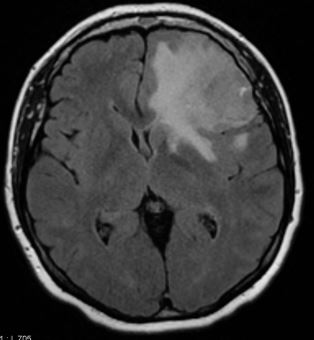

In [ ]:
cv2_imshow(tumor[0])

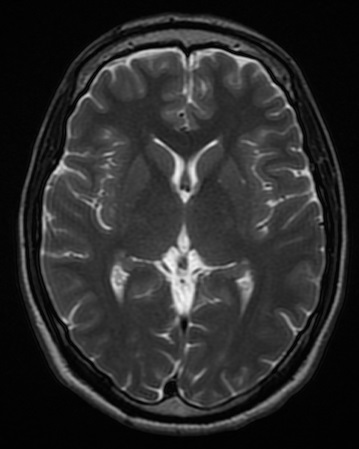

In [ ]:
cv2_imshow(no_tumor[0])

In [ ]:
tumor[1].shape

(351, 262)

**Encode the levels of target**

In [ ]:
labels = ['tumor'] * len(tumor) + ['no_tumor'] * len(no_tumor)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
target=label_encoder.fit_transform(labels)


In [ ]:
from keras.utils import to_categorical

# Assuming y_train and y_test are integer label arrays
target = to_categorical(target, num_classes=2)


**Task3: Create three empty lists data, paths, ans, Read the data under 'yes' and append the images in respective paths** 

In [ ]:
import numpy as np

In [ ]:
images = np.array(tumor+no_tumor)

<ipython-input-15-a8bcddcc030a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(tumor+no_tumor)


**Task4: Read the data under 'no' and append the images in by respective paths**

**Task5: Convert the image data to array and check its shape**

In [ ]:
images.shape

(253,)

**Task6: Convert the images in 'ans' to array and reshape to (139,2)**

In [ ]:
images = images/255

In [ ]:
images.shape

(253,)

In [ ]:
resized_images = []
for image in images:
    resized_image = cv2.resize(image, (128, 128))
    resized_images.append(resized_image)
resized_images = np.array(resized_images)

**Task7: Build a CNN model using the below architechture**

Sequential Model

Convolutional Layer with 32, kernel size (2,2), input shape (128,128,3), padding- 'same'

Activation function 'selu'

Batch Normalization

Maxpooling Pooling size (2,2)

Dropout- 0.25

Convolutional Layer with 64, kernel size (2,2),padding- 'same', Activation function 'selu'

Convolutional Layer with 64, kernel size (2,2),padding- 'same', Activation function 'selu'

Batch Normalization

Maxpooling Pooling size (2,2), strides- (2,2)

Dropout- 0.25

Flatten()

Dense Layer with 512, Activation function 'relu'

Dropout- 0.5

Dense Layer with 2, Activation function 'softmax'

compile with loss function- 'categorical cross entropy'; optimizer- 'Adamax'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adamax
from tensorflow import keras




In [ ]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), padding='same', input_shape=(128, 128, 1)))
model.add(keras.layers.Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(2,2), padding='same'))
model.add(keras.layers.Activation('selu'))
model.add(Conv2D(64, kernel_size=(2,2), padding='same'))
model.add(keras.layers.Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adamax(), metrics=['accuracy'])


**Task8: Split the data to train & test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(resized_images,target,test_size=0.2,random_state=101)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 128, 128, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 128, 128, 1))


**Task9: Fit the model with 30 epochs & batch size as 40**

In [ ]:
fit_model=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=40)

Epoch 1/30
6/6 [==============================] - 17s 3s/step - loss: 61.4155 - accuracy: 0.5396 - val_loss: 2.8676 - val_accuracy: 0.6667
Epoch 2/30
6/6 [==============================] - 19s 3s/step - loss: 21.3074 - accuracy: 0.6139 - val_loss: 4.1656 - val_accuracy: 0.5490
Epoch 3/30
6/6 [==============================] - 17s 2s/step - loss: 9.0824 - accuracy: 0.6881 - val_loss: 0.9783 - val_accuracy: 0.8824
Epoch 4/30
6/6 [==============================] - 16s 2s/step - loss: 7.6384 - accuracy: 0.6634 - val_loss: 0.7935 - val_accuracy: 0.8824
Epoch 5/30
6/6 [==============================] - 15s 2s/step - loss: 4.4456 - accuracy: 0.7822 - val_loss: 0.8899 - val_accuracy: 0.7843
Epoch 6/30
6/6 [==============================] - 15s 2s/step - loss: 3.7981 - accuracy: 0.7970 - val_loss: 0.7759 - val_accuracy: 0.8627
Epoch 7/30
6/6 [==============================] - 14s 2s/step - loss: 2.8088 - accuracy: 0.8069 - val_loss: 0.7189 - val_accuracy: 0.8431
Epoch 8/30
6/6 [================

**Task10: Plot the training & Validation loss values**

In [ ]:
import matplotlib.pyplot as plt

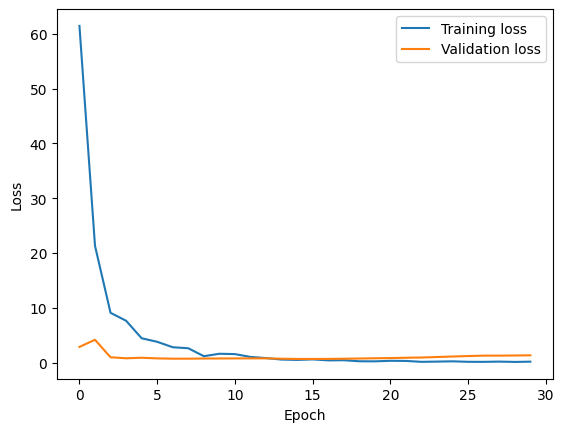

In [ ]:
plt.plot(fit_model.history['loss'], label='Training loss')
plt.plot(fit_model.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Task11: Pass an image from 'no' folder and the check the model predictions**

In [ ]:

from PIL import Image
import numpy as np


In [ ]:
def pred(path):
  image = Image.open(path).convert('L')

  image = image.resize((128,128))
  image = np.array(image)

  # Normalize the image
  image = image / 255.0

  # Add a new dimension to the image array to make it compatible with the input shape of the model
  image = np.expand_dims(image, axis=0)

  prediction = model.predict(image)[0]
  class_labels = ['Non-tumor', 'Tumor']

  # Get the predicted class label
  predicted_class_index = np.argmax(prediction)
  predicted_class = class_labels[predicted_class_index]

  # Print the predicted class and the predicted probability
  print('Predicted class:', predicted_class)
  print('Predicted probability:', prediction[predicted_class_index])
  

In [ ]:
pred('/content/drive/MyDrive/computer_vision/nodata/12 no.jpg')

1/1 [==============================] - 0s 168ms/step
Predicted class: Non-tumor
Predicted probability: 1.0


**Task11: Pass an image from 'yes' folder and the check the model predictions**

In [ ]:
pred('/content/drive/MyDrive/computer_vision/yesdata/Y105.jpg')

1/1 [==============================] - 0s 48ms/step
Predicted class: Tumor
Predicted probability: 0.7323521
